<a href="https://colab.research.google.com/github/beercafeguy/PyMLLab/blob/master/Time_Series_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install Pandas data reader

In [1]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import yfinance as yf

In [14]:
yf.pdr_override()

In [9]:
import os
import pandas_datareader as pdr
import pandas_datareader.data as web

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from datetime import datetime,timedelta

In [ ]:
data_source='yahoo'
pdr.get

In [24]:
df_tsla = web.DataReader(['TSLA'], start='2017-02-27', end='2023-05-02')

df_tsla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


In [25]:
type(df_tsla)

pandas.core.frame.DataFrame

In [26]:
df_tsla.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [27]:
df_tsla.shape

(1555, 6)

<Axes: xlabel='Date'>

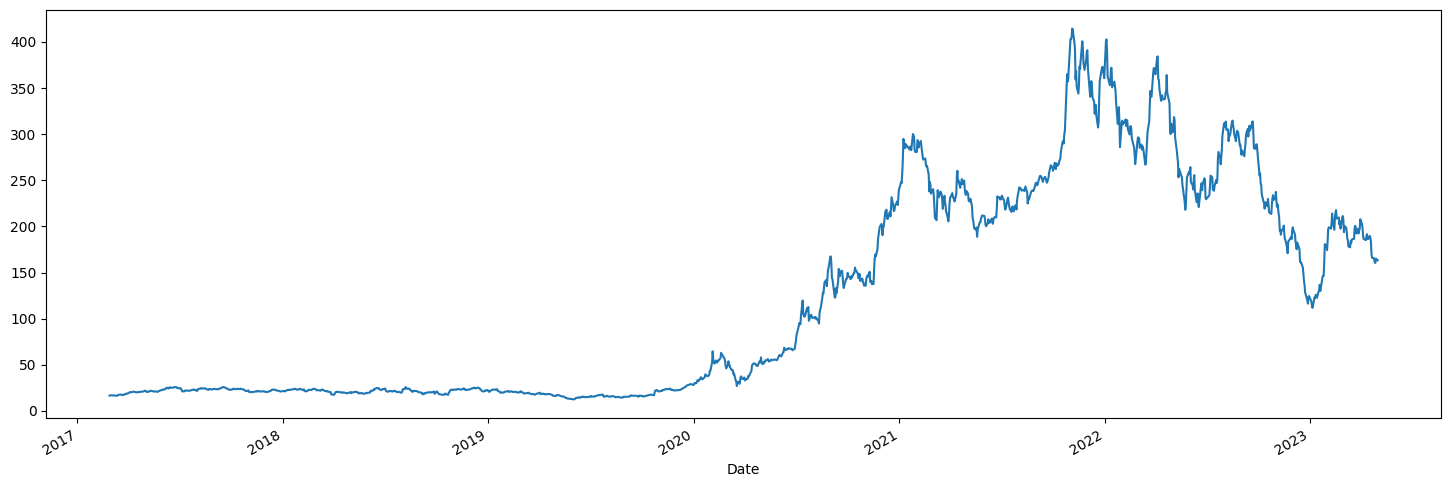

In [31]:
df_tsla['High'].plot(figsize=(18,6))

<Axes: xlabel='Date'>

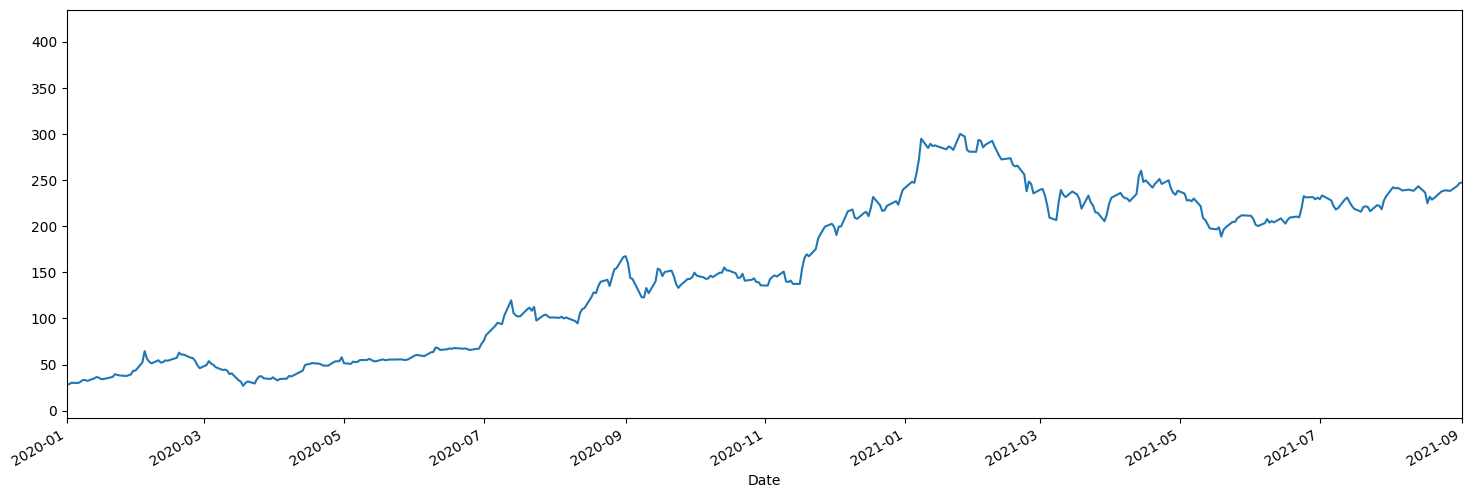

In [32]:
# X limit and Y limit
df_tsla['High'].plot(figsize=(18,6),xlim=['2020-01-01','2021-09-01'])

<Axes: xlabel='Date'>

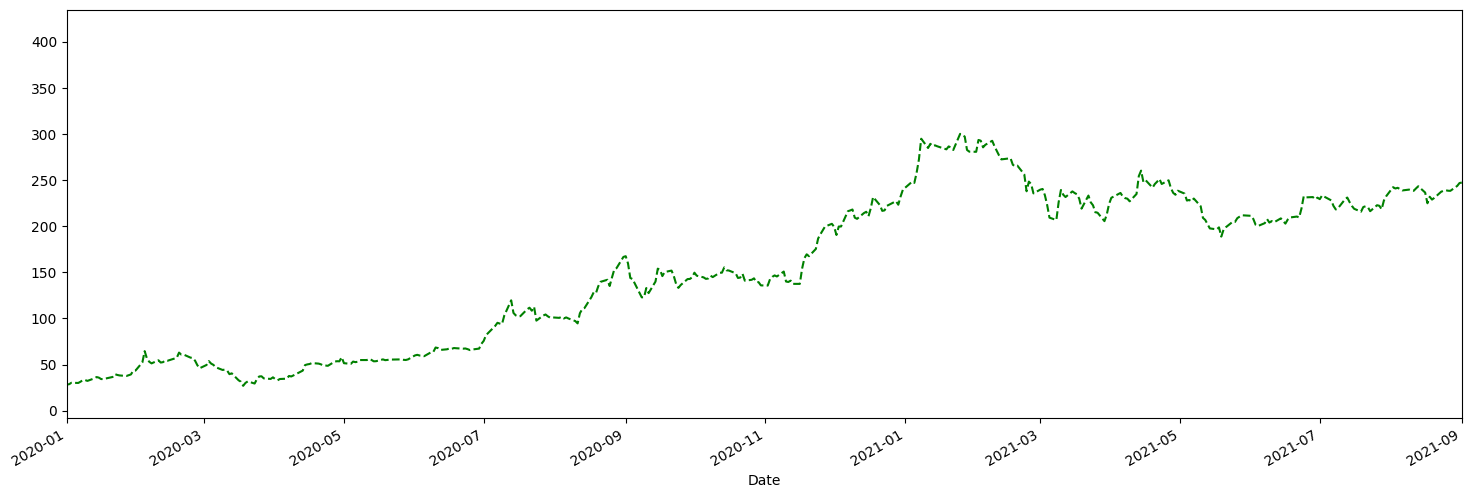

In [34]:
df_tsla['High'].plot(figsize=(18,6),xlim=['2020-01-01','2021-09-01'],color='green',ls='--')

In [36]:
df_tsla.index # get all dates

DatetimeIndex(['2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10',
               ...
               '2023-04-18', '2023-04-19', '2023-04-20', '2023-04-21',
               '2023-04-24', '2023-04-25', '2023-04-26', '2023-04-27',
               '2023-04-28', '2023-05-01'],
              dtype='datetime64[ns]', name='Date', length=1555, freq=None)

In [42]:
index=df_tsla.loc['2020-01-01':'2021-09-01'].index
share_proce_open_data = df_tsla.loc['2020-01-01':'2021-09-01']['Open']
share_proce_open_data

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

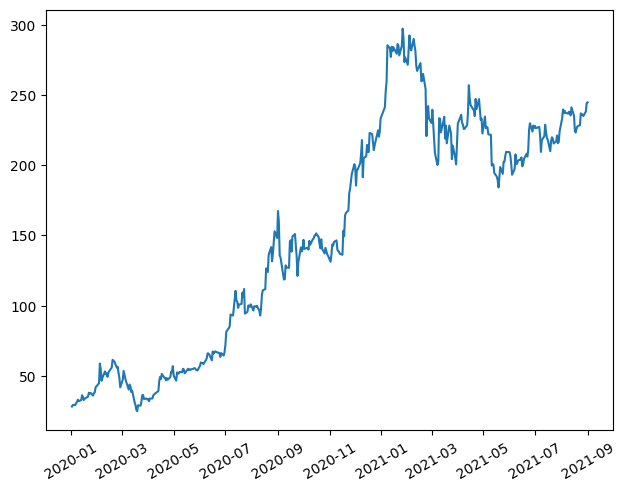

In [48]:
%matplotlib inline

figure,axis = plt.subplots()
plt.tight_layout()
plt.xticks(rotation=30)
# hide overlapping
#figure.autofmt_xdate()
axis.plot(index,share_proce_open_data)

In [51]:
# Datetime index
df_tsla = df_tsla.reset_index()
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      1555 non-null   int64         
 1   Date       1555 non-null   datetime64[ns]
 2   Open       1555 non-null   float64       
 3   High       1555 non-null   float64       
 4   Low        1555 non-null   float64       
 5   Close      1555 non-null   float64       
 6   Adj Close  1555 non-null   float64       
 7   Volume     1555 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 97.3 KB


In [58]:
df_tsla =df_tsla.set_index(df_tsla['Date'],drop=True)

In [62]:
df_tsla.drop(['index'],axis=1,inplace=True)

In [64]:
df_tsla.drop(['Date'],axis=1,inplace=True)

In [65]:
df_tsla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000
...,...,...,...,...,...,...
2023-04-25,159.820007,163.470001,158.750000,160.669998,160.669998,121999300
2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100
2023-04-27,152.639999,160.479996,152.369995,160.190002,160.190002,127015200


In [66]:
datetime(2021,12,23)

datetime.datetime(2021, 12, 23, 0, 0)

In [67]:
datetime.now()

datetime.datetime(2023, 5, 6, 12, 46, 46, 936867)

In [68]:
print(datetime.now())


def add_num(num1,num2):
  return num1+num2

print(add_num(2000000,300000000))
print(datetime.now())

2023-05-06 12:51:29.081404
302000000
2023-05-06 12:51:29.087478


In [70]:
dt = datetime(2021,12,23)
dt.date()

datetime.date(2021, 12, 23)

In [72]:
dt.day

23

In [73]:
dt.weekday()

3

In [74]:
dt.month

12

In [75]:
dt.year

2021

Time resampling

In [80]:
#year end frequency
df_tsla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,221923300
2023-12-31,211.759995,217.649994,206.110001,214.240005,214.240005,306590600


<Axes: xlabel='Date'>

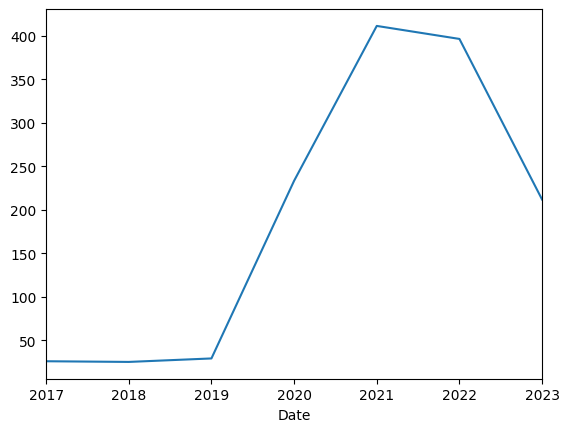

In [81]:
df_tsla.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

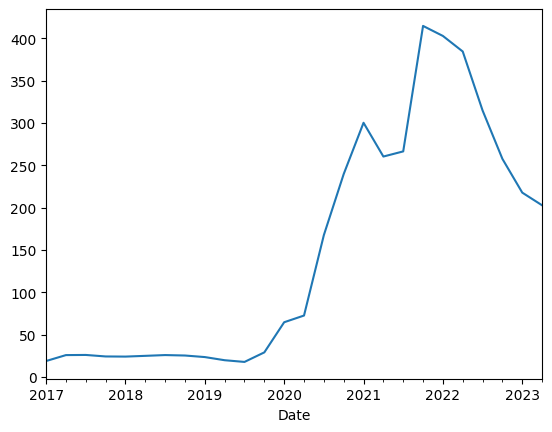

In [82]:
df_tsla.resample(rule='QS').max()['High'].plot()

<Axes: xlabel='Date'>

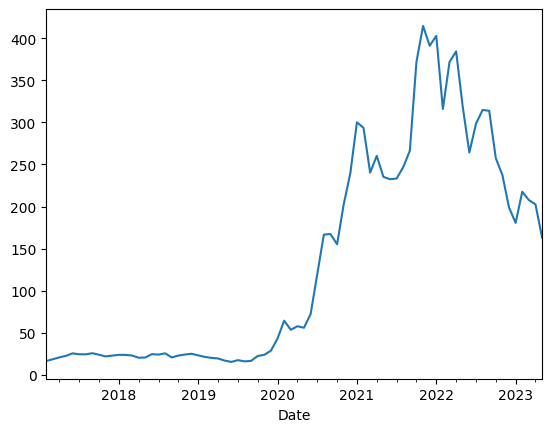

In [83]:
df_tsla.resample(rule='M').max()['High'].plot()

<Axes: xlabel='Date'>

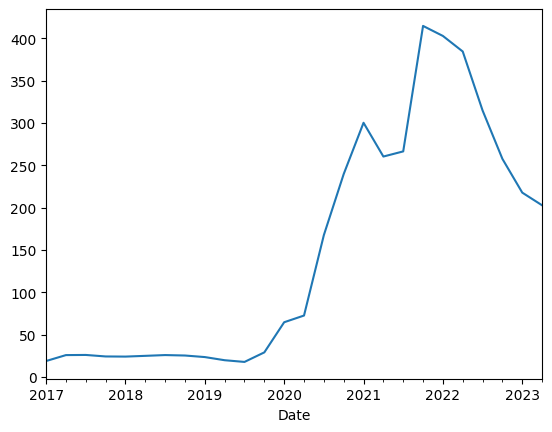

In [84]:
df_tsla.resample(rule='BQS').max()['High'].plot()

In [86]:
df_tsla.resample(rule='BQS').max().head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.582001,18.799999,18.480667,18.553333,18.553333,171912000
2017-04-03,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-03,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-02,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-02,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-02,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<Axes: xlabel='Date'>

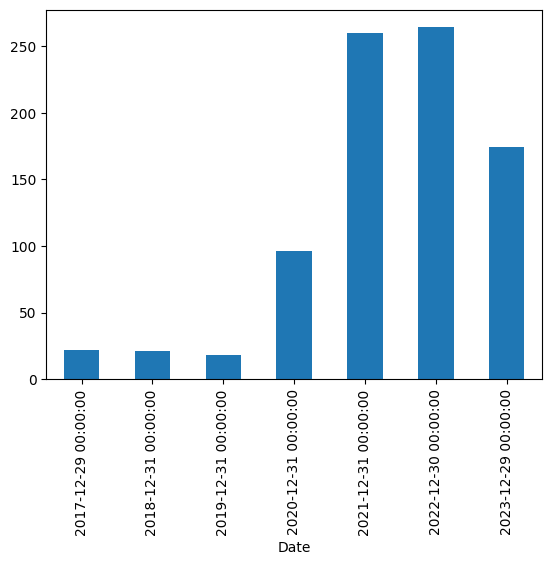

In [87]:
df_tsla['Open'].resample(rule='BA').mean().plot(kind='bar')

<Axes: xlabel='Date'>

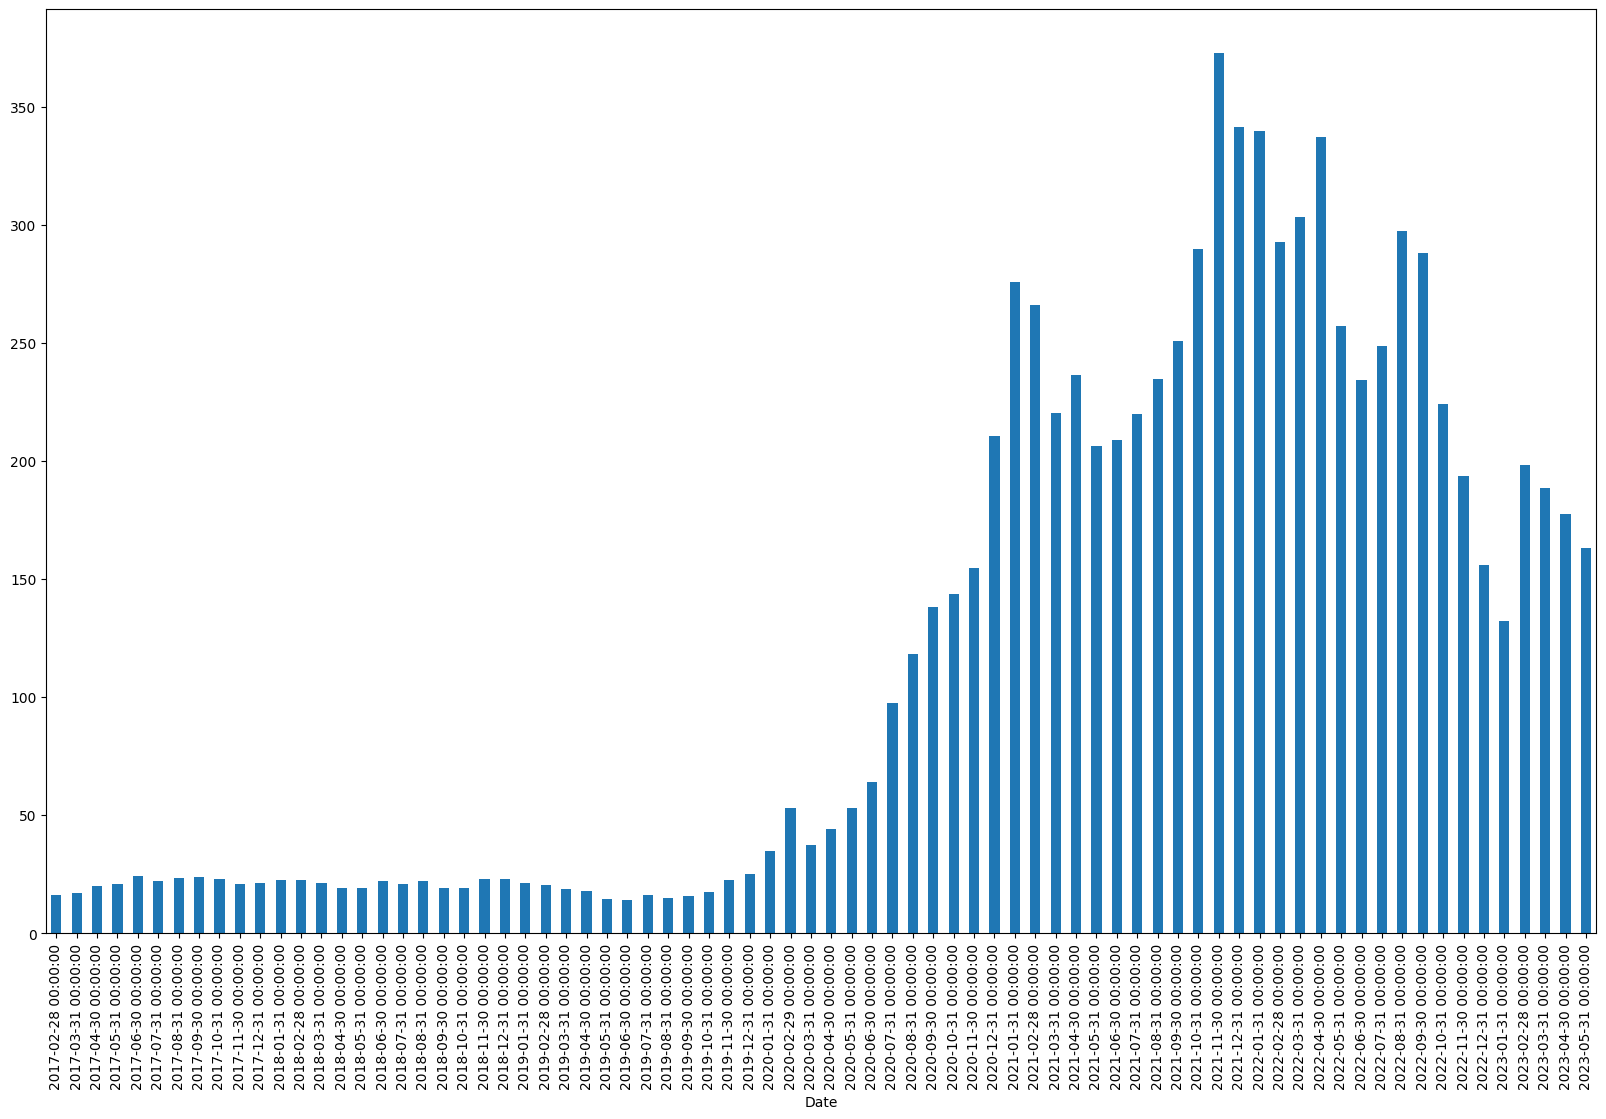

In [90]:
df_tsla['Open'].resample(rule='M').mean().plot(kind='bar',figsize=(20,12))

Rolling

In [96]:
df_tsla['High'].rolling(3).mean().head(20)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01    16.760222
2017-03-02    16.869555
2017-03-03    16.889555
2017-03-06    16.819555
2017-03-07    16.833111
2017-03-08    16.792445
2017-03-09    16.724889
2017-03-10    16.560666
2017-03-13    16.489111
2017-03-14    16.699333
2017-03-15    17.021556
2017-03-16    17.441556
2017-03-17    17.601778
2017-03-20    17.680667
2017-03-21    17.659556
2017-03-22    17.431556
2017-03-23    17.278667
2017-03-24    17.258444
Name: High, dtype: float64

<Axes: xlabel='Date'>

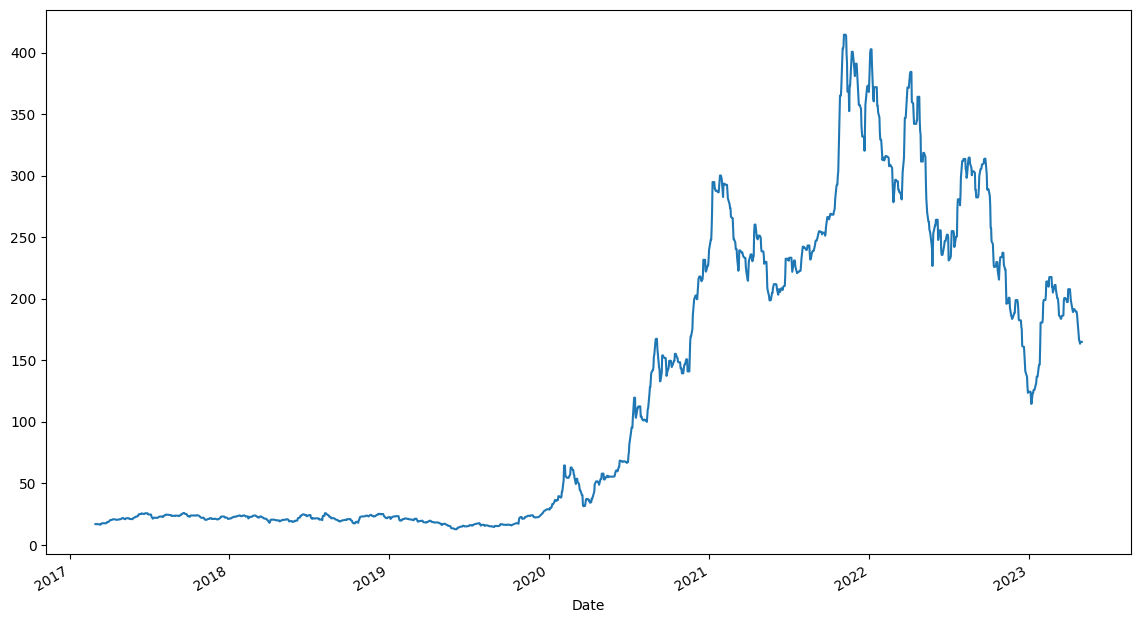

In [98]:
df_tsla['High'].rolling(3).max().plot(figsize=(14,8))

In [99]:
df_tsla['Open : 30 days rolling mean'] = df_tsla['Open'].rolling(30).mean()
df_tsla.head(50)

,Open,High,Low,Close,Adj Close,Volume,Open : 30 days rolling mean
Date,,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000,NaN
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500,NaN
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500,NaN
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000,NaN
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000,NaN
2017-03-06,16.527332,16.780001,16.500668,16.747334,16.747334,50332500,NaN
2017-03-07,16.794666,16.926001,16.554667,16.572666,16.572666,51892500,NaN
2017-03-08,16.466667,16.671333,16.354668,16.458000,16.458000,55878000,NaN
2017-03-09,16.508667,16.577333,16.200001,16.326668,16.326668,58189500,NaN


<Axes: xlabel='Date'>

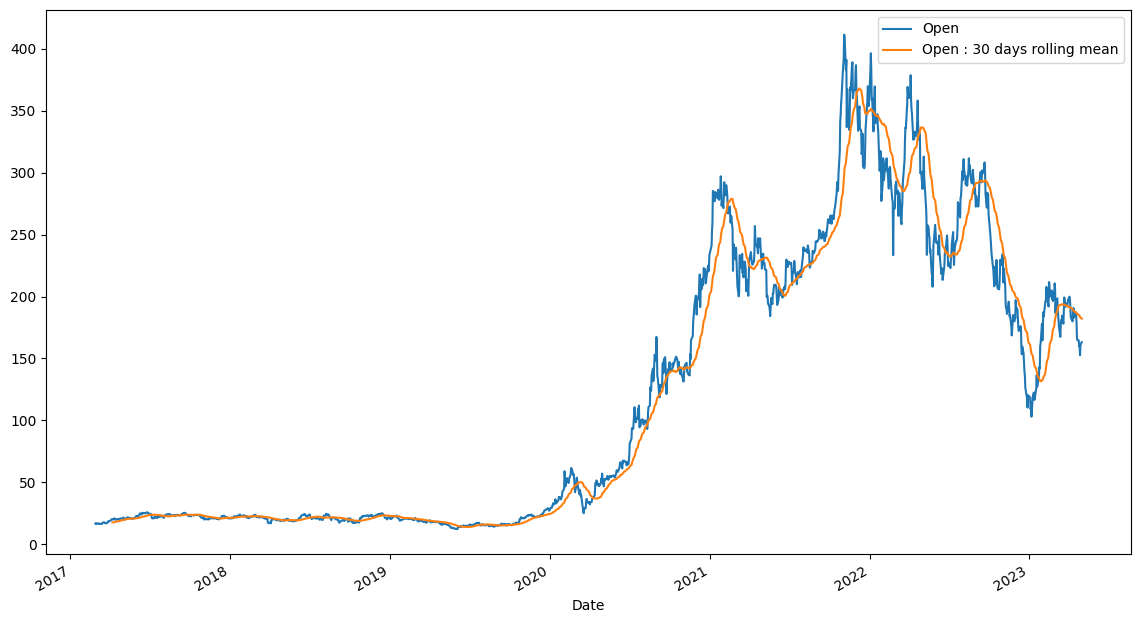

In [100]:
df_tsla[['Open','Open : 30 days rolling mean']].plot(figsize=(14,8))